## Car Listings Analysis on eBay Kleinanzeigen.
The goal of the analysis is to find out the most popular used car brands on  the eBay Kleinanzeigen website, determine their average price as well as their average milage.

Below is a description of the column names to help better understand the dataset.

* `dateCrawled` - When this ad was first crawled. All field-values are taken from this date.
* `name` - Name of the car.
* `seller` - Whether the seller is private or a dealer.
* `offerType` - The type of listing
* `price` - The price on the ad to sell the car.
* `abtest` - Whether the listing is included in an A/B test.
* `vehicleType` - The vehicle Type.
* `yearOfRegistration` - The year in which the car was first registered.
* `gearbox `- The transmission type.
* `powerPS`- The power of the car in PS.
* `model` - The car model name.
* `odometer` - How many kilometers the car has driven.
* `monthOfRegistration` - The month in which the car was first registered.
* `fuelType` - What type of fuel the car uses.
* `brand` - The brand of the car.
* `notRepairedDamage` - If the car has a damage which is not yet repaired.
* `dateCreated` - The date on which the eBay listing was created.
* `nrOfPictures` - The number of pictures in the ad.
* `postalCode` - The postal code for the location of the vehicle.
* `lastSeenOnline` - When the crawler saw this ad last online.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
autos = pd.read_csv('autos.csv', encoding = 'Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   dateCrawled          50000 non-null  object
 1   name                 50000 non-null  object
 2   seller               50000 non-null  object
 3   offerType            50000 non-null  object
 4   price                50000 non-null  object
 5   abtest               50000 non-null  object
 6   vehicleType          44905 non-null  object
 7   yearOfRegistration   50000 non-null  int64 
 8   gearbox              47320 non-null  object
 9   powerPS              50000 non-null  int64 
 10  model                47242 non-null  object
 11  odometer             50000 non-null  object
 12  monthOfRegistration  50000 non-null  int64 
 13  fuelType             45518 non-null  object
 14  brand                50000 non-null  object
 15  notRepairedDamage    40171 non-null  object
 16  date

# Cleaning The columns:
The columns are in camelcase instead of python's preffered snakecase. the columns are going to be changed to snake_case which will make it easier for indexing. Some column names will be completely changed. These columns are:

`yearOfRegistration` to `registration_year`

`monthOfRegistration` to `registration_month`

`notRepairedDamage` to `unrepaired_damage`

`dateCreated` to `ad_created`

In [5]:
autos.columns

Index(['dateCrawled', 'name', 'seller', 'offerType', 'price', 'abtest',
       'vehicleType', 'yearOfRegistration', 'gearbox', 'powerPS', 'model',
       'odometer', 'monthOfRegistration', 'fuelType', 'brand',
       'notRepairedDamage', 'dateCreated', 'nrOfPictures', 'postalCode',
       'lastSeen'],
      dtype='object')

In [6]:
autos.columns =['date_crawled', 'name', 'seller', 'offer_type', 'price', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'no_of_pictures', 'postal_code',
       'last_seen']

In [7]:
autos.head()

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


# Initial Exploration/ Data Cleaning:
The pd.describe() method will be used here to give an overview of data in each column. The include all argument is used to also get information on non-numeric data. With this, it'll be easy to figure out how to clean the data

In [8]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer,registration_month,fuel_type,brand,unrepaired_damage,ad_created,no_of_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-04-02 11:37:04,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


With further inspection of our data frame, we can see that the columns such as the offer_type, seller and no_of_pictures all have the same values for each row and so they are not necessary for our analysis. We are going to drop those columns using the pd.drop() method.

In [9]:
autos.drop(['offer_type', 'seller', 'no_of_pictures'], axis=1, inplace=True)

# Converting Price and Odometer Column to Numerical Data:
From the inspection of the dataframe, it shows that the price and odometer columns are type object which means that they are strings instead of integers or floats. We are going to remove the non numeric characters from these columns and then convert them to integers. We are also going to rename our `odometer` column to `odometer_km` since we are getting rid of the km symbol.

In [10]:
autos['price'] = autos['price'].str.replace('$', '', regex=True).str.replace(',', '',regex=True).astype(int)
autos['odometer'] = autos['odometer'].str.replace('km', '', regex=True).str.replace(',', '', regex=True).astype(int)
autos.rename({'odometer': 'odometer_km'}, axis =1,  inplace = True)

# Exploring Price and Odometer Column

In [11]:
autos['price'].unique().shape

(2357,)

In [12]:
print(autos['price'].describe())

autos['price'].value_counts().head()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price, dtype: float64


0       1421
500      781
1500     734
2500     643
1000     639
Name: price, dtype: int64

In [13]:
autos['price'].sort_values(ascending=False).head(10)

39705    99999999
42221    27322222
27371    12345678
39377    12345678
47598    12345678
2897     11111111
24384    11111111
11137    10000000
47634     3890000
7814      1300000
Name: price, dtype: int32

In [14]:
autos['price'].sort_values().head(10)

18089    0
43923    0
15225    0
29499    0
8445     0
38832    0
43925    0
8438     0
35821    0
31332    0
Name: price, dtype: int32

In [15]:
print(autos['price'].value_counts().sort_index(ascending=False).head(10))

print(autos['price'].value_counts().sort_index().head(10))

99999999    1
27322222    1
12345678    3
11111111    2
10000000    1
3890000     1
1300000     1
1234566     1
999999      2
999990      1
Name: price, dtype: int64
0     1421
1      156
2        3
3        1
5        2
8        1
9        1
10       7
11       2
12       3
Name: price, dtype: int64


After exploring our price column, it shows some outlier data. For example, the most expensive car listed is 100,000,000 which is an unlikely amount to pay for a car, while the least expensive car is $ 0 and this is also unlikely. Since this is an analysis of used car, an upper limit of 300,000 will be set and for the lower limit, we are going to use 1 as auctions from Ebay can start for as low as that price.

In [16]:
autos = autos[autos['price'].between(1, 300000)] #Drops the rows in the DataFrame where the price falls outside the range

In [17]:
autos['odometer_km'].unique().shape

(13,)

In [18]:
print(autos['odometer_km'].describe())

print(autos['odometer_km'].value_counts())

count     48563.000000
mean     125774.766798
std       39782.786221
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64
150000    31414
125000     5057
100000     2115
90000      1734
80000      1415
70000      1217
60000      1155
50000      1012
5000        835
40000       815
30000       780
20000       761
10000       253
Name: odometer_km, dtype: int64


# Exploring The Columns With Dates.
This includes the `date_crawled`, `ad_created`, `last_seen`, `registration_month` and `registration_year` columns. The data for the registration month and year are stored as integers while the data for the rest are stored as strings.

In [19]:
autos.loc[0:4, ['date_crawled', 'ad_created', 'last_seen']] #Gets the first five rows for the selected columns

,date_crawled,ad_created,last_seen
0,2016-03-26 17:47:46,2016-03-26 00:00:00,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-04 00:00:00,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-03-26 00:00:00,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-12 00:00:00,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 00:00:00,2016-04-01 14:38:50


Looking at the data above, the first 10 characters of our string is the date.

In [20]:
autos['date_crawled'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.025328
2016-03-06    0.014044
2016-03-07    0.036015
2016-03-08    0.033297
2016-03-09    0.033091
2016-03-10    0.032185
2016-03-11    0.032576
2016-03-12    0.036921
2016-03-13    0.015670
2016-03-14    0.036550
2016-03-15    0.034285
2016-03-16    0.029611
2016-03-17    0.031629
2016-03-18    0.012911
2016-03-19    0.034780
2016-03-20    0.037889
2016-03-21    0.037374
2016-03-22    0.032988
2016-03-23    0.032226
2016-03-24    0.029343
2016-03-25    0.031608
2016-03-26    0.032206
2016-03-27    0.031073
2016-03-28    0.034862
2016-03-29    0.034100
2016-03-30    0.033668
2016-03-31    0.031835
2016-04-01    0.033688
2016-04-02    0.035480
2016-04-03    0.038610
2016-04-04    0.036489
2016-04-05    0.013096
2016-04-06    0.003171
2016-04-07    0.001400
Name: date_crawled, dtype: float64

The above data shows that the site was crawled mainly between the months of March 2016 and April 2016.

In [21]:
autos['ad_created'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2015-06-11    0.000021
2015-08-10    0.000021
2015-09-09    0.000021
2015-11-10    0.000021
2015-12-05    0.000021
                ...   
2016-04-03    0.038857
2016-04-04    0.036859
2016-04-05    0.011820
2016-04-06    0.003254
2016-04-07    0.001256
Name: ad_created, Length: 76, dtype: float64

The data above shows the period when an ad was created. From this data, it shows that some of the ads were created as far back as June of 2015 and the most recent ad was created April of 2016

In [22]:
autos['last_seen'].str[:10].value_counts(normalize=True, dropna=False).sort_index()

2016-03-05    0.001071
2016-03-06    0.004324
2016-03-07    0.005395
2016-03-08    0.007413
2016-03-09    0.009596
2016-03-10    0.010667
2016-03-11    0.012376
2016-03-12    0.023784
2016-03-13    0.008896
2016-03-14    0.012602
2016-03-15    0.015876
2016-03-16    0.016453
2016-03-17    0.028087
2016-03-18    0.007351
2016-03-19    0.015835
2016-03-20    0.020654
2016-03-21    0.020633
2016-03-22    0.021374
2016-03-23    0.018533
2016-03-24    0.019768
2016-03-25    0.019212
2016-03-26    0.016803
2016-03-27    0.015629
2016-03-28    0.020860
2016-03-29    0.022342
2016-03-30    0.024772
2016-03-31    0.023784
2016-04-01    0.022795
2016-04-02    0.024916
2016-04-03    0.025204
2016-04-04    0.024484
2016-04-05    0.124766
2016-04-06    0.221815
2016-04-07    0.131932
Name: last_seen, dtype: float64

The last_seen data tells when last a listing was seen by the crawler. This can be as a result of the cars being sold or that the crawling of data from the site has ended.

In [23]:
autos['registration_year'].describe()

count    48563.000000
mean      2004.755040
std         88.645692
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Using the describe() method to look at the registration year, it shows that the minimum registration year is the year 1000 and that's centuries before the first cars were invented. The maximum registration year is shown to be 9999 which is too far in the future.

# Fixing Incorrect Registration Year

In [24]:
(autos['registration_year'].between(1930, 2016)).sum()/autos.shape[0]

0.9610608899779668

I've decided to use 1930 as my lower bound because that was the decade the beetle went into production. From our data, it shows that about 96% of our data falls between the registration year of 1930-2016. Only about 4% falls outside this range. Data outside of this range are going to be removed.

In [25]:
autos = autos[autos['registration_year'].between(1930, 2016)] # Drops rows with year value lower than 1930 and higher than 2016.

In [26]:
autos['registration_year'].value_counts(normalize=True)

2000    0.067621
2005    0.062907
1999    0.062071
2004    0.057915
2003    0.057829
          ...   
1939    0.000021
1948    0.000021
1938    0.000021
1953    0.000021
1931    0.000021
Name: registration_year, Length: 75, dtype: float64

The data above showed that the 5 most common years from the registration year are 2000,2005, 1999,2004 and 2003 with each of these years making up at least 6% of our data. While the least common years are 1939, 1943,1948, 1953, 1952 and each of them make up less than 0.1% of our data

# Exploring The Mean Price and Milage by Brand

(0.0, 10000.0)

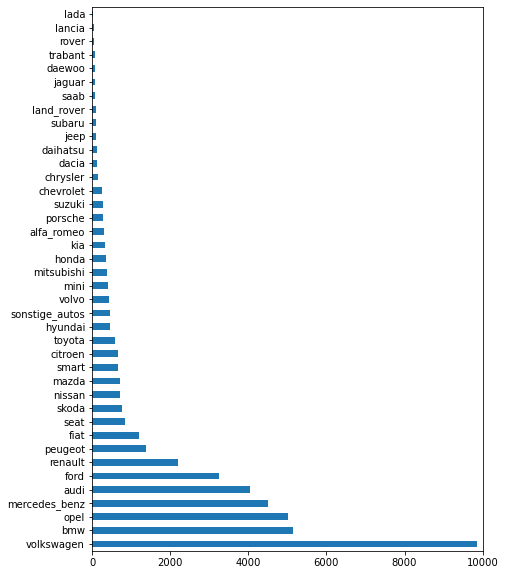

In [27]:
autos['brand'].value_counts().plot.barh(figsize=(7,10))
plt.xlim(0, 10000)

I'ved decided to look at the data of the top 10 most common brands from the graph. German cars such as Volkswagen, BMW, Opel, Mercedes Benz and Audi make up the top 5 cars in our data. With foreign brands such as Ford, Renault and Peugeot completing the top 10

In [28]:
brand_counts = autos['brand'].value_counts(normalize=True)

In [29]:
top_10_brands =  brand_counts[brand_counts > .017].index
print(top_10_brands) #All the brands in the top 10 have a value count greater than 0.17

Index(['volkswagen', 'bmw', 'opel', 'mercedes_benz', 'audi', 'ford', 'renault',
       'peugeot', 'fiat', 'seat'],
      dtype='object')


In [30]:
top_10_mean_price = {}
for b in top_10_brands:
    brand_needed = autos[autos['brand'] == b]
    mean_price = brand_needed['price'].mean()
    top_10_mean_price[b] = int(mean_price)
    
print(top_10_mean_price)

{'volkswagen': 5402, 'bmw': 8332, 'opel': 2976, 'mercedes_benz': 8628, 'audi': 9336, 'ford': 3745, 'renault': 2475, 'peugeot': 3094, 'fiat': 2813, 'seat': 4397}


In [31]:
top_10_mean_milage ={}
for b in top_10_brands:
    brand_needed = autos[autos['brand'] == b]
    mean_milage = brand_needed['odometer_km'].mean()
    top_10_mean_milage[b] = int(mean_milage)
print(top_10_mean_milage) 

{'volkswagen': 128707, 'bmw': 132597, 'opel': 129311, 'mercedes_benz': 130788, 'audi': 129157, 'ford': 124302, 'renault': 128127, 'peugeot': 127153, 'fiat': 117121, 'seat': 121131}


In [32]:
top10mp_series = pd.Series(top_10_mean_price)#converts the dictionary to a pandas series
print(top10mp_series)

volkswagen       5402
bmw              8332
opel             2976
mercedes_benz    8628
audi             9336
ford             3745
renault          2475
peugeot          3094
fiat             2813
seat             4397
dtype: int64


In [33]:
top10mm_series = pd.Series(top_10_mean_milage)
print(top10mm_series)

volkswagen       128707
bmw              132597
opel             129311
mercedes_benz    130788
audi             129157
ford             124302
renault          128127
peugeot          127153
fiat             117121
seat             121131
dtype: int64


In [34]:
top_10_cars = pd.DataFrame(top10mp_series, columns=['mean_price'])#converts the series to a pandas dataFrame
top_10_cars

,mean_price
volkswagen,5402
bmw,8332
opel,2976
mercedes_benz,8628
audi,9336
ford,3745
renault,2475
peugeot,3094
fiat,2813
seat,4397


In [35]:
top_10_cars['mean_milage'] = top10mm_series
top_10_cars.sort_values('mean_milage', ascending=False, inplace=True)
top_10_cars


,mean_price,mean_milage
bmw,8332,132597
mercedes_benz,8628,130788
opel,2976,129311
audi,9336,129157
volkswagen,5402,128707
renault,2475,128127
peugeot,3094,127153
ford,3745,124302
seat,4397,121131
fiat,2813,117121


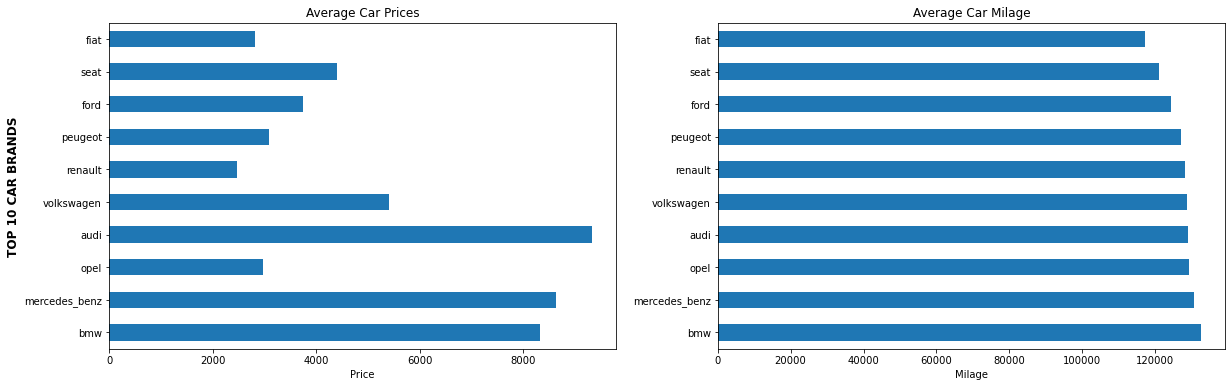

In [36]:
plt.figure(figsize= (20, 6))
plt.subplot(1, 2, 1)
top_10_cars['mean_price'].plot.barh()
plt.xlabel('Price')
plt.ylabel('TOP 10 CAR BRANDS', size= 12, weight='bold')
plt.title('Average Car Prices')


plt.subplot(1, 2, 2)
top_10_cars['mean_milage'].plot.barh()
plt.xlabel('Milage')
plt.title('Average Car Milage')

plt.show()

# Conclusion

The most popular cars listed are mainly German cars. They make up 50% of the top 10 car brands and on average they are more expensive than the other brands.
Audi cars tend to be the most expensive, followed by the Mercedes and then BMW.
The Milage for the cars seem pretty consistent with each of the cars having about 120,000km